In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ** NCovert Channel Detection Using Naive Bayes **


In [2]:
# Two classes exist in this dataset: 1 and 0
# 1 = Covert packet
# 0 = Normal packet
dataset = pd.read_excel('Final NCovert TCP SEQ Dataset.xlsx')
dataset.head(10)

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.checksum,tcp.checksum.dec,tcp.flags.syn,class
0,1282372197,1282372197,0,0x0000d601,54785,1,1
1,1830840688,1830840688,0,0x0000be45,48709,1,1
2,1937075488,1937075488,0,0x0000b440,46144,1,1
3,1685023855,1685023855,0,0x0000c3f7,50167,1,1
4,1914729321,1914729321,0,0x0000af4c,44876,1,1
5,1948279149,1948279149,0,0x0000bf48,48968,1,1
6,1702112288,1702112288,0,0x00000342,834,1,1
7,1668247155,1668247155,0,0x0000c2f3,49907,1,1
8,1701016677,1701016677,0,0x0000bb0d,47885,1,1
9,1953853984,1953853984,0,0x0000ae40,44608,1,1


In [3]:
dataset.tail()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.checksum,tcp.checksum.dec,tcp.flags.syn,class
100393,877849138,877849138,235054815,0x0000aded,44525,0,0
100394,235054815,235101535,877849138,0x0000646e,25710,0,0
100395,877849138,877849138,235101535,0x0000aded,44525,0,0
100396,235101535,235113215,877849138,0x0000db8d,56205,0,0
100397,877849138,877849138,235113215,0x0000aded,44525,0,0


In [4]:
# Check if there are any nulls
dataset.isnull().sum(axis=0)
# No nulls detected

tcp.seq             0
tcp.nxtseq          0
tcp.ack             0
tcp.checksum        0
tcp.checksum.dec    0
tcp.flags.syn       0
class               0
dtype: int64

In [5]:
# Count the different types of packets
total_covert_packets = dataset [ dataset ['class'] == 1 ]
total_normal_packets = dataset [ dataset ['class'] == 0 ]
print(f'Total covert packets: {len(total_covert_packets)}')
print(f'Total normal packets: {len(total_normal_packets)}')

Total covert packets: 50199
Total normal packets: 50199


In [6]:
# Total packets in the dataset
print(len(dataset))

100398


In [7]:
# Right now the dataset contains hexadecimal values
# These must be dropped 
dataset = dataset.drop(['tcp.checksum'], axis=1)

In [8]:
dataset.head(20)

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.checksum.dec,tcp.flags.syn,class
0,1282372197,1282372197,0,54785,1,1
1,1830840688,1830840688,0,48709,1,1
2,1937075488,1937075488,0,46144,1,1
3,1685023855,1685023855,0,50167,1,1
4,1914729321,1914729321,0,44876,1,1
5,1948279149,1948279149,0,48968,1,1
6,1702112288,1702112288,0,834,1,1
7,1668247155,1668247155,0,49907,1,1
8,1701016677,1701016677,0,47885,1,1
9,1953853984,1953853984,0,44608,1,1


In [9]:
dataset.tail()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.checksum.dec,tcp.flags.syn,class
100393,877849138,877849138,235054815,44525,0,0
100394,235054815,235101535,877849138,25710,0,0
100395,877849138,877849138,235101535,44525,0,0
100396,235101535,235113215,877849138,56205,0,0
100397,877849138,877849138,235113215,44525,0,0


In [10]:
# Ready for data visualisation
import seaborn as sns

C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Anish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


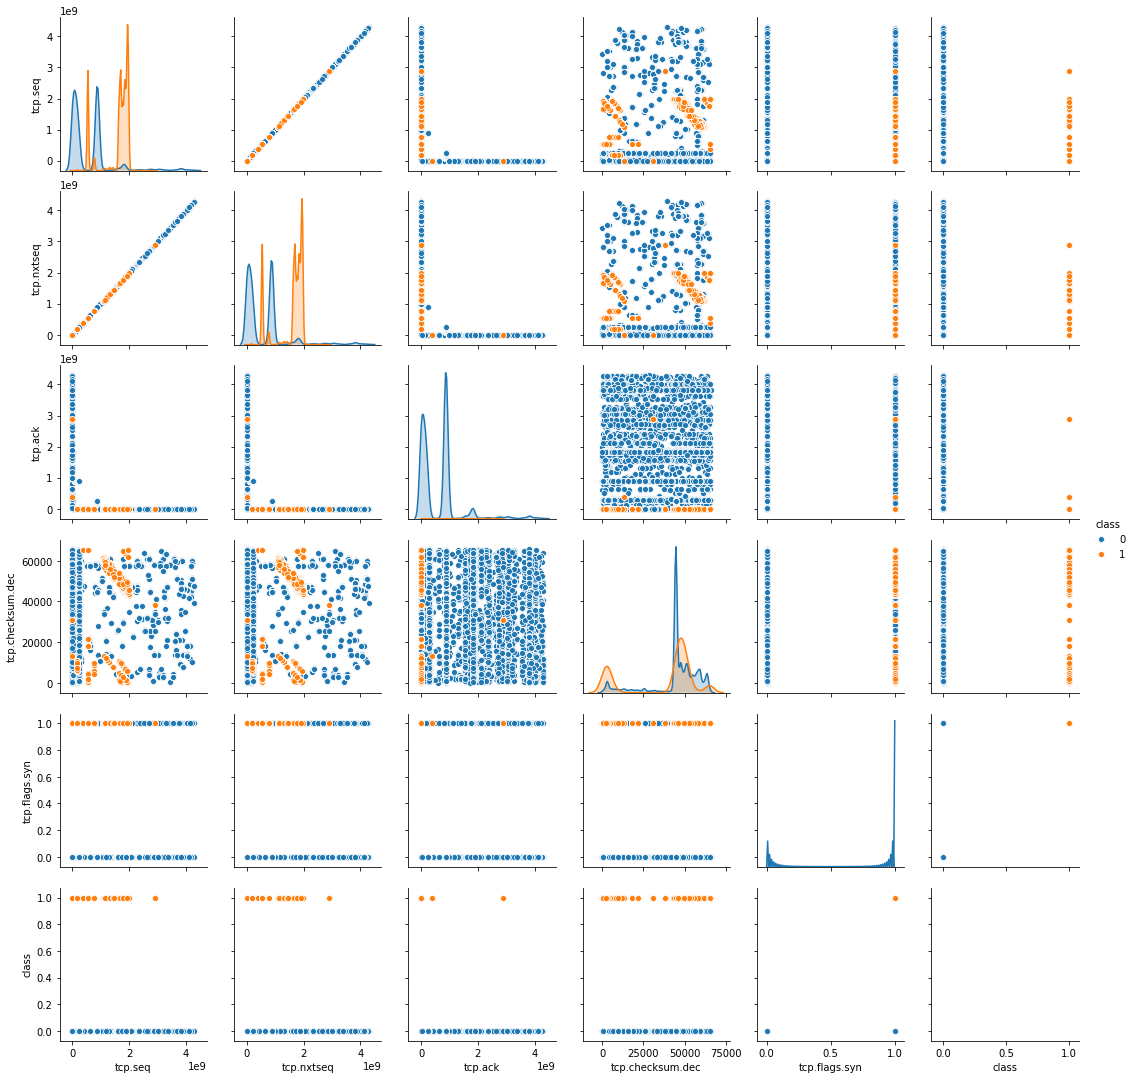

In [11]:
sns.pairplot(dataset, hue='class')

In [12]:
# Set the independent and dependent variables
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [13]:
# View the independent variables
X.head()

,tcp.seq,tcp.nxtseq,tcp.ack,tcp.checksum.dec,tcp.flags.syn
0,1282372197,1282372197,0,54785,1
1,1830840688,1830840688,0,48709,1
2,1937075488,1937075488,0,46144,1
3,1685023855,1685023855,0,50167,1
4,1914729321,1914729321,0,44876,1


In [14]:
# Class
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [15]:
# Split the dataset into training and testing sets
# Stratify it so there is equal number of packets in the two classes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [16]:
# Check the size the datasets
print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(75298, 5)
(25100, 5)

(75298,)
(25100,)


In [17]:
# Scale the variables for faster computation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Import the necessary modules for the voting classifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(solver='lbfgs')
nb = GaussianNB()
svm = SVC(kernel='rbf', gamma='auto')
classifier = VotingClassifier(estimators=[('lr', lr), ('nb', nb), ('svm', svm)], voting='hard')
classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('nb',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('svm',
                              SVC(C=1.0, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_s

In [19]:
# Predict the test data
y_predict = classifier.predict(X_test)
print(y_predict)

[0 0 1 ... 1 0 0]


In [20]:
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model score
score = classifier.score(X_test, y_test)
print(score, '%')

# Accuracy using the accuracy_score function from the sklearn.metrics
score = accuracy_score(y_test, y_predict)
print(score, '%')

# The quality of the predictions being made
report = classification_report(y_test, y_predict)
print(report)

# The confusion matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

0.9986852589641434 %
0.9986852589641434 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12550
           1       1.00      1.00      1.00     12550

    accuracy                           1.00     25100
   macro avg       1.00      1.00      1.00     25100
weighted avg       1.00      1.00      1.00     25100

[[12517    33]
 [    0 12550]]


In [21]:
from sklearn.model_selection import cross_validate
scores = cross_validate(classifier, X, y,cv=10, return_train_score=True, n_jobs=-1)
print(f'KFold cross validation scores: {scores}')
avg = np.average(scores['test_score'])
print(f'Average score is {avg}')
print()

KFold cross validation scores: {'fit_time': array([2464.63430929, 2446.73872256, 2403.44983625, 2418.02339196,
       2460.80749273, 2473.13958549, 2422.5447731 , 2420.46156096,
       1384.57420897, 1272.01255226]), 'score_time': array([40.53226686, 39.54485273, 41.28876543, 41.53404689, 41.56704116,
       42.54599309, 39.27567029, 42.0340507 , 23.24424219, 23.47687984]), 'test_score': array([0.86085657, 0.95139442, 0.93994024, 0.89671315, 0.94750996,
       0.95936255, 0.97450199, 0.98027888, 0.95657371, 0.97559275]), 'train_score': array([0.95385024, 0.94965581, 0.95860909, 0.95427079, 0.94977755,
       0.94864871, 0.94951194, 0.95567631, 0.94863764, 0.94726649])}
Average score is 0.944272422166286



In [22]:
# Print the score of each model
from sklearn.metrics import accuracy_score
for clf in (lr, nb, svm, classifier):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9986055776892431
GaussianNB 0.9986852589641434
SVC 0.9993227091633466
VotingClassifier 0.9986852589641434


In [23]:
# Save the best model
import pickle
pickle.dump(classifier, open('ncovert_tcp_seq_vc_model', 'wb'))
trained_model = pickle.load(open('ncovert_tcp_seq_vc_model', 'rb'))
result_val = trained_model.score(X_train, y_train)
result_test = trained_model.score(X_test, y_test)
print(result_val)
print(result_test)

# Save the scaler too
from sklearn.externals.joblib import dump, load
dump(scaler, 'ncovert_tcp_seq_vc_model.bin', compress=True)
scaler_loaded = load('ncovert_tcp_seq_vc_model.bin')

0.9986453823474727
0.9986852589641434


C:\Users\Anish\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
